# Deep Learning & Artificial Intelligence
## Neural Networks Basics, Chapter 3
### Dr. Jie Tao, Fairfield University

## Components of NNs

When we talk about any NN, we talk about the _following_ things about it:

- **Architecture**: how many layers, how many neurons in each layer, respectively;
- **Layers**: which consist of an architecture - typically we talk about 3 types of layers:
  - (Multiple) Layered Perceptron (MLP): typically used for __tabular__ data
  - Convolutional Neural Networks (CNN): typically used for __image__ data
  - Recurrent Neural Networks (RNN): typically used for __text__ or other __sequence__ data
- __Input data__ ($X$) and the corresponding **target** values ($y$)
- __Loss function__: which defines how to train the NN against (e.g., accuracy, MAE)
- __Optimizer__: how to search for the weight values for the _minimal_ loss value.

### Illustration of NN

![illustration of NN](https://drek4537l1klr.cloudfront.net/chollet/Figures/03fig01.jpg)

### Layers: Building Blocks of NN

- A layer is a data processing unit in a NN
  - which takes one or more tensors as input and outputs one or more tensors
- Most layers have a __state__, which means it contains some _weights_
  - __weights__, aka., _parameters_, are learned via SGD or other optimizers
- Training a NN == Learning all the weights in all the layers


### Fully-Connected Layers

- __Fully Connected__: these layers are basically inter-connected linear models.
  - We use __FC__ layers for __tabular__ data
  - this is known as the `Dense` layers in `keras`
  - input is usually 2D (`input_shape = (samples, features`) - if `features` is 1 then can be `(samples, )`
  - output is usually 1D (`shape = (1, n)`), in which `n` is the number of neurons in the layer
- If _all_ hidden layers in a NN are __FC__, this NN is called a __Multi-layered Perceptron__ (MLP) network.

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
model = Sequential()
fc_layer = Dense(16, input_shape=(8,))
model.add(fc_layer)
print('input shape is :', fc_layer.input_shape)
print('output shape is :', fc_layer.output_shape)

input shape is : (None, 8)
output shape is : (None, 16)


### Models - Implementation of NN

- __Models__ define how the _layers__ are connected together
  - __PRO TIP__: however you connect your layers in a model, you need to make sure that the input from the current layer is the __same shape__ as the output of the previous layer. So as you begin, check the shape of every layer is always good practice.
- Basically, we use __models__ by stacking _layers_ together. But we do have other types of model structures
  - Two-branch NNs
  - Multihead NNs
  - Inception Blocks
- __Models__ let you map _input data_ to _output data_
  - After each layer, the _input data_ is transformed into a different space
  - So the transformed _input data_ can be new __features__
    - __PRO TIP__: sometimes we use the intermediate output from a layer as engineered features
- Picking the right model architecture is more art than science
  - it takes experience to learn how to pick the best model

In [ ]:
model1 = Sequential()

model1.add(Dense(32, input_shape=(784,)))
# Don't worry about activation just yet
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
# we typically use model summary to
# check if the model is constructed as expected
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
Total params: 25,784
Trainable params: 25,784
Non-trainable params: 0
_________________________________________________________________


Sometimes we also plot the model structure to test if the input and output data in subsequent layers are of the same shape.

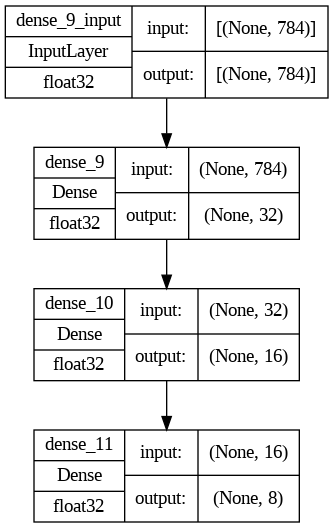

In [ ]:
from tensorflow.keras.utils import plot_model

# we purposely use `show_shapes` to display the input &
# output shapes, and we check data types by using `show_dtype`
# Note that the input layer is create by keras automatically
plot_model(model1, show_shapes=True, show_dtype=True)

### YOUR TURN HERE

Construct a new model `model2` with only the `Dense` layers.

- `model2` should consist of __FOUR__ dense layers, with `256`, `128`, `64` and `10` neurons, respectively.
- print out summary of `model2`, and plot it.

In [ ]:
model2 = Sequential()

model2.add(Dense(256, input_shape=(784,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='relu'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


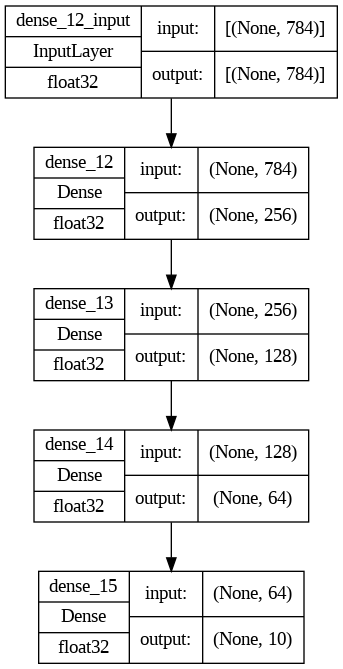

In [ ]:
from tensorflow.keras.utils import plot_model

# we purposely use `show_shapes` to display the input &
# output shapes, and we check data types by using `show_dtype`
# Note that the input layer is create by keras automatically
plot_model(model2, show_shapes=True, show_dtype=True)

### Loss Functions - How to Evaluate Your Model

- The __loss function__, aka., _objective_ function, represent how successful a model is for a specific task
  - Specifically, the _loss value_ by the loss function is tied to the output of the NN (_model_)
  - it is _crucial_ to pick the __correct__ loss function for the task/analytical problem
- For regression-like problems:
  - we use loss functions such as Mean Squared Error (MSE) or Mean Absolute Error (MAE)
  - __PRO TIP__: you should always consider normalize your MSE/MAE against the range of the target
- For binary classification problems:
  - we use Binary Cross-Entropy Loss: the difference between each $ \hat{y} $ and $y$, usually _negative log-loss_ (NLL);
  - Additionally we can use [Hinge Loss](https://en.wikipedia.org/wiki/Hinge_loss), which is developed for SVMs
- For multi-class classification:
  - we use Multi-class Cross-Entropy loss - [this article](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) explains cross-entropy well;
  - Alternatively we use Kullback Leibler Divergence Loss - which measures how different two distributions are [ref](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). If distributions of $ \hat{y} $ and $y$ are similar, the classification result is good.


### Optimizers

- As discussed in last lecture, __optimizers__ (e.g., SGD) are used to update the weights in a network during training, to minimize the loss function
- For most of your networks, you just need to use one of the following three optimiers (preference in that order):
  - Adam
  - SGD
  - RMSProp
- You can find [a good article](https://towardsdatascience.com/a-quick-guide-to-neural-network-optimizers-with-applications-in-keras-e4635dd1cca4) explaining them, as well as a few others.
- Both __Loss Functions__ and __Optimizers__ are defined when you __compile__ the model.

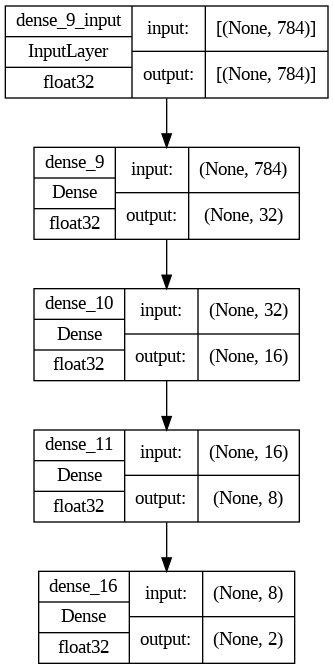

In [ ]:
# Let's first add an output layer to our `model1`

model1.add(Dense(2))

plot_model(model1, show_dtype=True, show_shapes=True)

In [ ]:
# Then complie the model
# Since we are doing binary classification
# Loss Function: Binary Cross-Entropy Loss
# Optimizer: Adam

from tensorflow.keras.optimizers import Adam
# define learning rate for adam optimizer
opt = Adam(lr=0.01)

# compiling
# note the metrics - we are telling keras what metrics it should monitor the NN on
# can be accracy or f1-score, or other metrics you used in classification models
model1.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 2)                 18        
                                                                 
Total params: 25,802
Trainable params: 25,802
Non-trainable params: 0
_________________________________________________________________


### A (Re)Introduction to Keras

- `keras` is a user-friendly API on the backend of `tensorflow`
  - There are multiple backends other than `tensorflow`, including `theano` and `PyTorch`. Refer to Lecture 1 for more details
  - `keras` makes our life easier - we can define any NN models without define the specifics of the componnets
  - `keras` does that by providing __pre-defined__ layers and other functions for DL models

### Key Features of `keras`

- Compared to `PyTorch`, `keras` allows you to use (almost) the same code on CPU/GPU;
- If your model architecture is simple, `keras` allows you to build a model in no time;
- `keras` contains pre-defined layers/functions for CNN or RNN natively;
- You can define any model architecture as you wish, although for complex NNs you might want to consider `PyTorch`
- `keras` takes care of the _high-level_ design of your models, whereas the actual tensor operations happen in its backend `tensorflow`

### `keras` Workflow

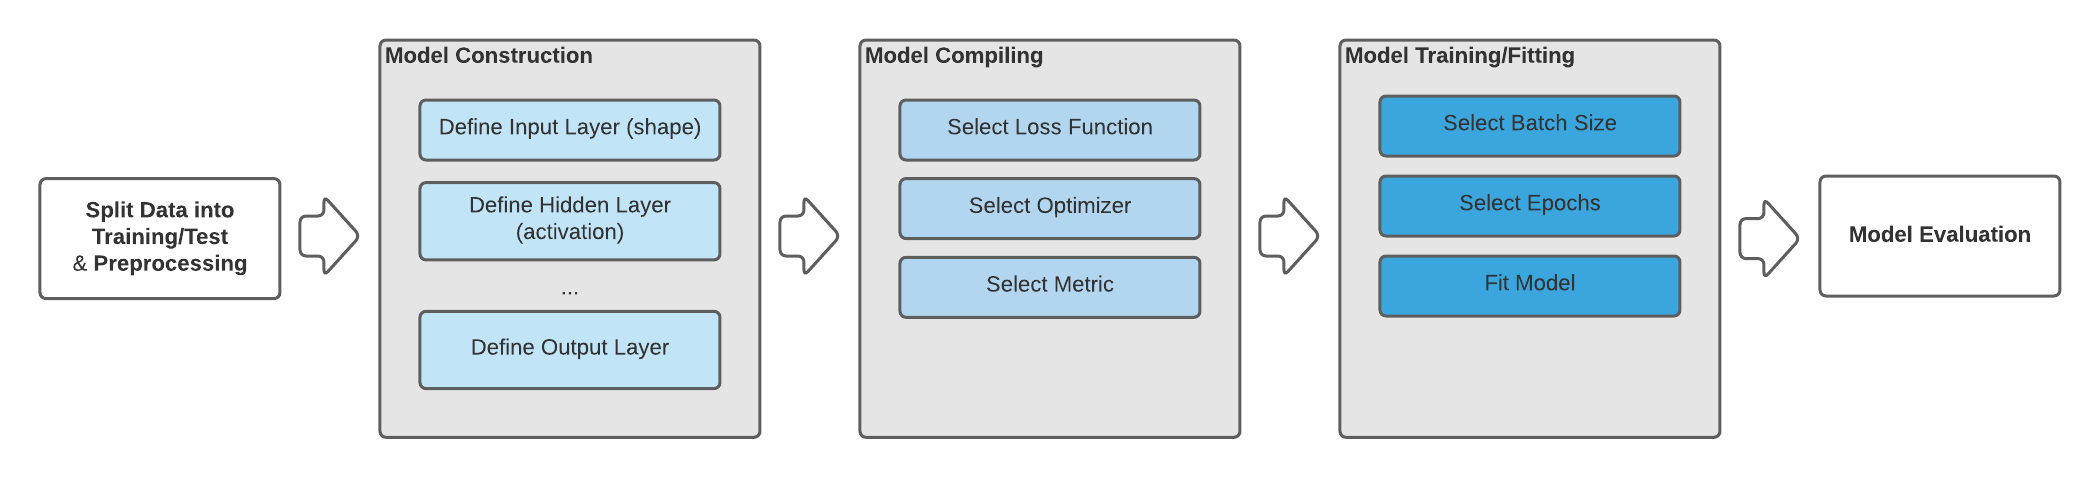

## A Binary Classification Example: Classifying Movie Reviews

- Binary classification is the most popular type of machine learning problems
- In this example, we try to:
  - classify the sentiment (_positive/negative_) of a movie review;
  - based on the text contents of the review


### Getting the Data

- We use the `imdb` dataset which come with `keras` in this example
  - the data is pre-split into _training_ and _test_ sets

In [ ]:
from tensorflow.keras.datasets import imdb

# With text data, we usually focus on the top-N most frequent words
# because the more words you have, the more resources you need
# also, less frequent words may mislead the model
# in this example we use the top-10000 frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# the data is embedded, meaning the words are replaced with their IDs
# in a vocabulary, so the sentence would look like below
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# the labels corresponds to the review by id
# so the label of review 0 is positive (1)
train_labels[0]

1

In [ ]:
# Because we limit to the top-10000 most frequent words
# no word id will exceed 9999
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# we can translate the review back to English words

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

1641221/1641221 [==============================] - 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the Data

- Typically with text classification problems, preprocessing means two steps:
  - __Padding__: we need to make sure every text sample (e.g., a review) are of the same length, so the training/test sets are in the shape of `[samples, max_length]` - refer to the [official doc](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) for more details;
  - __One-Hot Encoding__: turning the list of word IDs into vectors of 0s and 1s - refer to [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you need a refresher - refer to the [official docs](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) for more detail.
- Both are supported natively by `keras`.

In [ ]:
#############################################################
#### Padding - In this particular example, we exclude padding
#### since after OHE, the sequences are of same length anyway
#### if we use `embedding` layer (discuss later)
#### then padding is required
#############################################################
# from tensorflow.keras.preprocessing.sequence import pad_sequences
############################################################
#### one way is we can use the maximal length in the texts
#### and padded all others to that length
#### or we can pick an arbitrary length
#############################################################
# max_len = max(max([len(sequence) for sequence in train_data]), max([len(sequence) for sequence in test_data]))
#### max_len
# train_data_padded = pad_sequences(train_data, maxlen=max_len, padding='post')
# test_data_padded = pad_sequences(test_data, maxlen=max_len, padding='post')

In [ ]:
train_data.shape

(25000,)

In [ ]:
import numpy as np
############################################################
#### One-Hot Encoding
#### If you try to encode the targets, yo can use the function below
# from tensorflow.keras.utils import to_categorical
##############################################################
#### But in our case, we need to use our own function
#### to OHE the data

def vectorize_sequences(sequences, dimension=10000):
    '''
    INPUT:
    ------
    - sequences(list or NumPy array): sequence to be encoded
    - dimension (int): number of classes to be encoded

    OUTPUT:
    ------
    - result (NumPy array): encoded sequences
    '''
    # initialize an array with the shape of
    # [number of sequences, dimensions] to hold the results
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      # get the ID of the sequence
      # for instance, for sequence [1], if the sequence is [3, 5]
      # then replace row 1, colomn 3 & 5 to 1
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#### we should also convert the labels into vectors
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model Construction

- Given the input data as vectors and targets as scalars (`0`s and `1`s), we can simply use an MLP network for this problem
  - review that MLP networks are simply stacked `Dense` layers - refer to Lecture 2 if you need a refresher
  

- Within model construction, there are _two_ key design decisions you have to make:
  - How many layers
  - How many neurons on each layer respectively
- We will learn how to determine this formally in Lecture 4, for now we will just use:
  - Two intermediate layers with 16 hidden units each
    - The first layer need to define the `input_shape` - which the dimensions is `10000`
    - in this case we will use the `relu` activation that we saw several times already - note that we can use different activations here
  - A third layer that will output the scalar prediction regarding the sentiment of the current review
    - since `y` has __two__ unique values, we just need __one__ neuron in the output layer
    - for binary classificaiton we can use `sigmoid` activation in the output layer
    - __PRO TIP__: for all binary classification we only need __one__ neuron in the output layer; but in some predefined models it set __two__ neurons in the layer - that is okay too.

### Illustration of the Activation Functions

- ReLU

![relu](https://drek4537l1klr.cloudfront.net/chollet/Figures/03fig04_alt.jpg)

-Sigmoid

![sigmoid](https://drek4537l1klr.cloudfront.net/chollet/Figures/03fig05_alt.jpg)

Refer to the textbook for more details on them.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### we use the Sequential API here
#### we will learn the other (functional API) later
bc_model = Sequential()
#### Add the 1st hidden layer, specifying the `input_shape`
#### Note that for sequence data, `input_shape` is always (dimension,)
bc_model.add(Dense(16, activation='relu', input_shape=(10000,)))
#### Add the 2nd hidden layer
bc_model.add(Dense(16, activation='relu'))
#### Add the output layer
bc_model.add(Dense(1, activation='sigmoid'))


bc_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                160016    
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


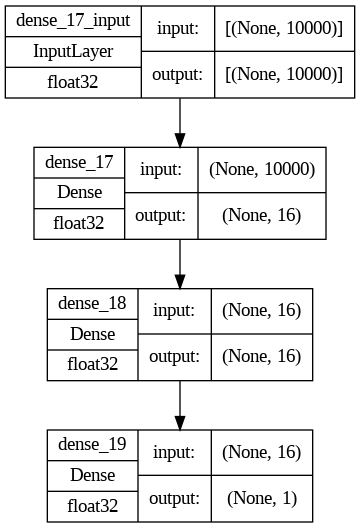

In [ ]:
#### plot the model

from tensorflow.keras.utils import plot_model

plot_model(bc_model, show_shapes=True, show_dtype=True)

### Model Compiling

- While compiling, we need to specify the following hyperparameters for the model - refer to Lecture 2 if you need a refresher:
  - Optimizer: `adam` is a good optimizer for first try - of course you can use `rmsprop` as suggested by the textbook
    - We can just use optimizer out-of-the-box, or we can specify the `learning_rate` and other things about it;
  - loss: for binary classification problems, we typically use `binary_crossentropy`
  - metrics: `accuracy` is the first choice here, but you can use other metrics

- Refer to the textbook (3.4.3) for __custom__ optimizers and metrics.

In [ ]:
bc_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

### Validating Your Model

- As learned in Machine Learning, we reserve a set of __validation data__ tuning the hyperparameters of the model. We can take one of the two ways when using `keras`:
  - like we did with `sklearn`, we split a set of data for validation
  - or just specify a ratio of the data (typically `10%`, or `0.1`) when `fit` the model

### Train Your Model

- Training your NN model is similar to training any ML model, you need to specify the training data (`X_train`) and training labels (`y_train`) in `fit`.
- However, there are a few additional hyperparameters you need to set:
  - `batch_size`
  - `epochs`

In [ ]:
#### It is a good practice to specify `batch_size` and `epochs` on their own
#### so that you can re-use them when train different models
#### you can then compare performance from these models
#### note that we use capital letters since these are reserved words in `keras`
BATCH_SIZE = 512
EPOCHS = 20

### Batch Size vs. Epochs

- These are the two important but confusing terms in NN:
  - As discussed in Lecture 2, a __batch__ refers to the number of samples passed to a model, before updating the weights in the network
  - An __epoch__ means a network is trained through the entire training dataset
    - You can simply think of epochs as how many times the networks is trained, with the dataset;
    - Because of the __stochastic__ nature of SGD, or any of its variants, every epoch will yield different results
    - One epoch is never enough - the more epochs you use, the better chance the model finds the __global optimum__ in training
    - However, there is no set value for the "best" number of epochs. It depends on the complexity of your network, the size of your training data, and the difficulty of the analytical problem.
  - A related term is called __iteration__:
    - if `training data size` is 1024, `batch_size` is 32, then in each epoch, the model is trained in 32 iterations.
    - That is why later on we can see `loss values` between epochs (e.g., `1.5` epoch)
$$ iteration = \frac{training\ data\ size}{batch\ size} $$

In [ ]:
history = bc_model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2)

Epoch 1/20
40/40 [==============================] - 3s 43ms/step - loss: 0.5290 - acc: 0.7874 - val_loss: 0.3597 - val_acc: 0.8700
Epoch 2/20
40/40 [==============================] - 1s 31ms/step - loss: 0.2700 - acc: 0.9077 - val_loss: 0.2794 - val_acc: 0.8888
Epoch 3/20
40/40 [==============================] - 2s 43ms/step - loss: 0.1881 - acc: 0.9366 - val_loss: 0.2741 - val_acc: 0.8902
Epoch 4/20
40/40 [==============================] - 2s 43ms/step - loss: 0.1460 - acc: 0.9533 - val_loss: 0.2880 - val_acc: 0.8890
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 0.1153 - acc: 0.9643 - val_loss: 0.3110 - val_acc: 0.8860
Epoch 6/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0902 - acc: 0.9744 - val_loss: 0.3400 - val_acc: 0.8812
Epoch 7/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0722 - acc: 0.9806 - val_loss: 0.3732 - val_acc: 0.8784
Epoch 8/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0572 - a

It is always a good practice to visualize the training process, particularly `loss` and `accuracy`, across all the epochs. This is good since we can observe whether we __overfit__ our model. Between `loss` and `accuracy`, we always prefer `loss` since it is the foundation of the optimization. Also, we should focus on the validation loss (`val_loss`) since training loss is not a good indicator of overfitting.

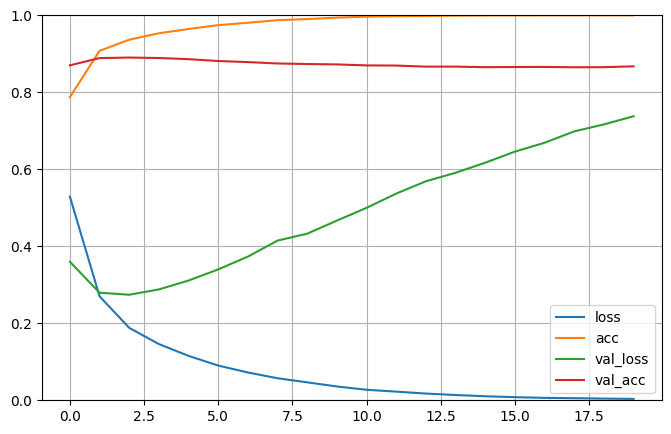

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



We can observe that the model overfits after epcoh `2.5`. So we can retrain the nmodel with much less epochs.

__PRO TIP__: When you try to retrain the model, you need to redefine the model from [this step](#scrollTo=oGfeQc8M6O3s&line=9&uniqifier=1).

### YOUR TURN HERE

Build anther model `bc_model` with the same structure as `bc_model`. Just change `EPOCHS` to `4`. Plot the results like [above](#scrollTo=TckcAvvbEOLY&line=3&uniqifier=1).

In [ ]:
# write you code here
history = bc_model.fit(X_train,
                    y_train,
                    epochs=4,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2)

Epoch 1/4
40/40 [==============================] - 2s 46ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.7555 - val_acc: 0.8648
Epoch 2/4
40/40 [==============================] - 2s 46ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.7734 - val_acc: 0.8654
Epoch 3/4
40/40 [==============================] - 1s 32ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.7910 - val_acc: 0.8652
Epoch 4/4
40/40 [==============================] - 1s 31ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.8059 - val_acc: 0.8664


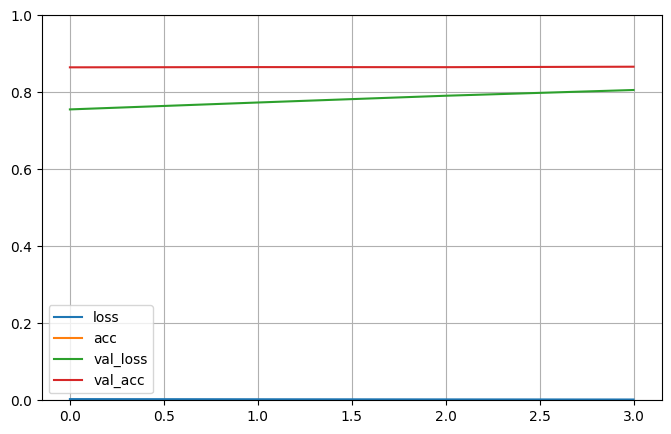

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


### Evaluate Your Model

We can evaluate our model using the reserved test data `X_test`.

In [ ]:
#### since it's a binary classification problem, we use `predict_classes`
#### if you use `predict` only you will get the real value between [0,1]
#### rather than 0 or 1

y_pred = bc_model.predict(X_test, verbose=0) #### will be deprecated
y_pred = np.argmax(bc_model.predict(X_test), axis=-1)

# we can use what we used in ML, like classification report & confusion matrix
# to evaluate our NN model performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

782/782 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     12500
         1.0       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like our model is doing okay on testing data (with `0.85` f1-score).

In [ ]:
#### we can also look at the classification probabilities
#### how it works is if the probability > 0.5 then it classified as 1 otherwise 0

y_prob = bc_model.predict(X_test[:5])
y_prob

1/1 [==============================] - 0s 20ms/step


array([[0.07706854],
       [1.        ],
       [0.4562164 ],
       [0.6323378 ],
       [0.9998448 ]], dtype=float32)

In [ ]:
#### we can also look at `y_test` for comparison
#### looks like we got #4 totally wrong
y_test[:5]

array([0., 1., 1., 0., 1.], dtype=float32)

### YOUR TURN HERE

Define a new model `bc_model2`, try a few different things:
- try different number of layers, like `1` or `3`;
- try different number of neurons on each layer, like `32` or `64`;
- try the `tanh` activation - which is more and more popular recently;
- try using the `rmsprop` optimizer with different `learning_rate` (`0.01`, `0.001`), as suggested in the text book
- try different `batch_size`, such as `128` or `256`.

Report what combination of above __hyperparameters__ yields the __BEST__ `f1-score` on `X_test`.


In [ ]:
#### write your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

bc_model2 = Sequential()
bc_model2.add(Dense(32, activation='tanh', input_shape=(10000,)))
bc_model2.add(Dense(32, activation='tanh'))
bc_model2.add(Dense(32, activation='tanh'))
bc_model2.add(Dense(1, activation='sigmoid'))

bc_model2.compile(optimizer=RMSprop(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

bc_model2.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                320032    
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = bc_model2.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split = 0.2)

Epoch 1/5
157/157 [==============================] - 3s 15ms/step - loss: 0.4320 - accuracy: 0.8036 - val_loss: 0.3135 - val_accuracy: 0.8752
Epoch 2/5
157/157 [==============================] - 2s 13ms/step - loss: 0.2411 - accuracy: 0.9068 - val_loss: 0.2900 - val_accuracy: 0.8884
Epoch 3/5
157/157 [==============================] - 2s 12ms/step - loss: 0.1788 - accuracy: 0.9336 - val_loss: 0.3166 - val_accuracy: 0.8718
Epoch 4/5
157/157 [==============================] - 2s 14ms/step - loss: 0.1359 - accuracy: 0.9482 - val_loss: 0.3514 - val_accuracy: 0.8816
Epoch 5/5
157/157 [==============================] - 3s 17ms/step - loss: 0.1077 - accuracy: 0.9601 - val_loss: 0.3734 - val_accuracy: 0.8826


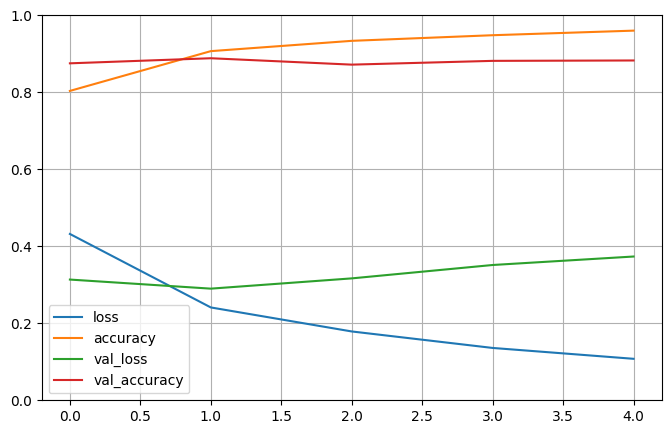

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


### YOUR TURN HERE

Read section 3.5 and 3.6 on the textbook, answer following questions.

- What are the main differences between the models for _multi-class classification_ and _regression_ problems and the mode we built above, in terms of __layers__, __number of neurons__, and __activation__?
- What are the main differences between the models for _multi-class classification_ and _regression_ problems and the mode we built above, in terms of __optimizer__, __loss function__, and __metrics__?
- Any other notable differences you can observe across these models?


*   Multi-class classification models typically use softmax activation in the final layer with a number of neurons equal to the number of classes. Regression model may have a linear activation in the final layer. The model we built above is for binary classification.
*   Multi-class classification models typically use categorical cross-entropy loss, while regression models often use mean squared error (MSE) or mean absolute error (MAE) loss. For metrics, multi-class classification models commonly use accuracy, precision, recall, and F1-score, while regression models use metrics like MSE, MAE, or R-squared. The model we built above uses binary cross-entropy loss and accuracy as the metric for binary classification.



# Deep Learning & Artificial Intelligence
## Neural Networks Basics, Chapter 3
### Dr. Jie Tao, Fairfield University